# Model 2: Basic CNN from Scratch

**Öğrenci Bilgileri:**
- **Adı:** Eren Ali
- **Soyadı:** Koca
- **Okul Numarası:** 2212721021
- **GitHub Repo:** https://github.com/erennali/CNN_airpods_magicmouse

---

Bu model, CIFAR-10 tarzı basit bir CNN mimarisi kullanarak sıfırdan eğitilmiştir. Transfer learning kullanmadan AirPods ve Magic Mouse sınıflandırması yapar.

## 📁 Google Drive Bağlantısı

**Drive Mount İşlemi:**
- Uyg1 klasörü Drive'da olacak
- Dataset ve notebook dosyaları Drive'dan erişilecek
- Model dosyası (.h5) otomatik olarak Drive'a kaydedilecek

In [4]:
from google.colab import drive
drive.mount('/content/drive')

print("✅ Google Drive başarıyla bağlandı!")
print("📂 Drive dosyalarınız: /content/drive/MyDrive/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive başarıyla bağlandı!
📂 Drive dosyalarınız: /content/drive/MyDrive/


## 🔧 Proje Yolunun Ayarlanması

**Path Yapısı:**
```
/content/drive/MyDrive/Uyg1/
├── model2.ipynb
├── dataset/
│   ├── airpods/
│   └── magic_mouse/
└── model2_basic_cnn.h5 (eğitim sonrası oluşacak)
```

In [5]:
import os

PROJECT_PATH = '/content/drive/MyDrive/Uyg1'
os.chdir(PROJECT_PATH)

print(f"✅ Çalışma dizini: {os.getcwd()}")
print(f"📂 Bu klasördeki dosyalar: {os.listdir('.')}")

✅ Çalışma dizini: /content/drive/MyDrive/Uyg1
📂 Bu klasördeki dosyalar: ['requirements.txt', '.gitignore', '.DS_Store', 'prepare_dataset.py', 'README.md', 'model3.ipynb', '.git', 'dataset', 'model1_transfer_learning.h5', 'IMG_6157.JPG', 'IMG_6159.JPG', 'IMG_6166.JPG', 'model1.ipynb', 'model2.ipynb']


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

if len(tf.config.list_physical_devices('GPU')) > 0:
    print("✅ GPU aktif - Eğitim hızlı olacak!")
else:
    print("⚠️ GPU bulunamadı - Runtime -> Change runtime type -> GPU seçin")

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {len(tf.config.list_physical_devices('GPU'))}")
print(f"Keras version: {keras.__version__}")

✅ GPU aktif - Eğitim hızlı olacak!
TensorFlow version: 2.19.0
GPU Available: 1
Keras version: 3.10.0


## 📚 Gerekli Kütüphanelerin İçe Aktarılması

Bu model için gerekli kütüphaneleri yüklüyoruz. Model 1'den farklı olarak burada **sıfırdan (from scratch)** bir CNN modeli oluşturacağız, transfer learning kullanmayacağız.

- **TensorFlow & Keras**: Derin öğrenme framework'ü
- **Sequential**: Katmanları sıralı şekilde eklemek için kullanılan model tipi
- **Conv2D**: 2 boyutlu evrişim (convolution) katmanı - görüntüden özellikleri çıkarır
- **MaxPooling2D**: Maksimum havuzlama katmanı - görüntü boyutunu küçültür ve önemli özellikleri korur
- **Dense**: Tam bağlantılı (fully connected) katman - sınıflandırma yapar
- **Flatten**: Çok boyutlu veriyi tek boyuta çevirir (Conv katmanlarından Dense katmanlara geçiş için)
- **Dropout**: Aşırı öğrenmeyi (overfitting) önlemek için rastgele nöronları devre dışı bırakır
- **ImageDataGenerator**: Görüntüleri yükler ve ön işleme tabi tutar
- **Adam**: Optimize edici algoritma
- **matplotlib & numpy**: Görselleştirme ve sayısal işlemler için

In [8]:
IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 30
DATASET_PATH = 'dataset/'

print(f"\n✅ Sıfırdan eğitim için ayarlar hazır!")

print("=" * 50)
print("=" * 50)

print("📊 MODEL 2 HİPERPARAMETRELER")
print(f"DATASET_PATH  : {DATASET_PATH}")

print("=" * 50)
print(f"EPOCHS        : {EPOCHS} epoch")

print(f"IMG_SIZE      : {IMG_SIZE} x {IMG_SIZE} pixels")
print(f"BATCH_SIZE    : {BATCH_SIZE} görüntü/batch")


✅ Sıfırdan eğitim için ayarlar hazır!
📊 MODEL 2 HİPERPARAMETRELER
DATASET_PATH  : dataset/
EPOCHS        : 30 epoch
IMG_SIZE      : 128 x 128 pixels
BATCH_SIZE    : 32 görüntü/batch


## ⚙️ Hiperparametrelerin Belirlenmesi

Model 2 için eğitim parametrelerini tanımlıyoruz:

### 📐 IMG_SIZE = 128
**Neden 128?**
- Model 1'de VGG16 için 224 kullanmıştık
- Sıfırdan eğitimde daha küçük boyut tercih edilir
- 128x128 → Daha hızlı eğitim, daha az bellek
- Basit CNN modelleri için yeterli çözünürlük


### 📦 BATCH_SIZE = 32```

**Neden 32?**└── magic_mouse/

- Standart batch size değeri├── airpods/

- Model 1 ile aynı (karşılaştırma için)dataset/

- GPU belleği için optimal```

**Yapı:**

### 🔄 EPOCHS = 30### 📂 DATASET_PATH = 'dataset/'

**Neden 30?**

- **Model 1:** 25 epoch (transfer learning)- From Scratch → Çok epoch, yavaş yakınsama

- **Model 2:** 30 epoch (sıfırdan öğrenme)- Transfer Learning → Az epoch, hızlı yakınsama

- Sıfırdan eğitim daha fazla epoch gerektirir**Karşılaştırma:**

- Model hiçbir bilgi olmadan başlıyor
- Her şeyi sıfırdan öğrenmeli

In [10]:
print("📊 Veri setini yüklüyorum...\n")

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print(f"   Model 3'te augmentation ekleyip karşılaştıracağız!")
print(f"\n⚠️ NOT: Model 1'den farklı olarak Data Augmentation YOK")
print(f"✅ Sınıflar: {list(train_generator.class_indices.keys())}")
print(f"✅ Validation görüntüler: {validation_generator.samples}")
print(f"\n✅ Training görüntüler: {train_generator.samples}")

📊 Veri setini yüklüyorum...

Found 105 images belonging to 2 classes.
Found 25 images belonging to 2 classes.
   Model 3'te augmentation ekleyip karşılaştıracağız!

⚠️ NOT: Model 1'den farklı olarak Data Augmentation YOK
✅ Sınıflar: ['airpods', 'magic_mouse']
✅ Validation görüntüler: 25

✅ Training görüntüler: 105


## 📂 Veri Setinin Yüklenmesi ve Hazırlanması

Model 1 ile aynı şekilde veri setimizi yüklüyoruz:

**Normalizasyon:**
- `rescale=1./255`: Piksel değerlerini 0-1 arasına ölçekler
- Sinir ağları 0-255 aralığındaki büyük sayılarla değil, 0-1 aralığındaki küçük sayılarla daha iyi çalışır

**Veri Bölme:**
- `validation_split=0.2`: Verinin %20'si doğrulama, %80'i eğitim için kullanılır
- Doğrulama seti modelin eğitim sırasındaki performansını izlemek için kullanılır

**Otomatik Sınıf Etiketleme:**
- `flow_from_directory()`: Klasör isimlerini otomatik olarak sınıf etiketleri yapar
  - `airpods/` klasörü → Sınıf 0
  - `magic_mouse/` klasörü → Sınıf 1
- `class_mode='categorical'`: One-hot encoding ile etiketler oluşturulur

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

## 🏗️ Basit CNN Modelinin Oluşturulması (CIFAR-10 Tarzı)

Bu bölümde **sıfırdan** basit bir CNN modeli oluşturuyoruz. Model, CIFAR-10 veri setinde kullanılan klasik CNN mimarisine benzer.

### 🔹 Model Katmanları:

**1. İlk Evrişim Bloğu:**
```python
Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3))
MaxPooling2D(2, 2)
```
- **Conv2D(32)**: 32 adet 3x3 filtre ile görüntüden temel özellikler çıkarır (kenarlar, köşeler)
- **activation='relu'**: ReLU aktivasyon fonksiyonu (negatif değerleri sıfırlar)
- **MaxPooling2D(2, 2)**: Görüntü boyutunu yarıya indirir (128x128 → 64x64)

**2. İkinci Evrişim Bloğu:**
```python
Conv2D(64, (3, 3), activation='relu')
MaxPooling2D(2, 2)
```
- **Conv2D(64)**: 64 filtre ile daha karmaşık özellikler öğrenir (şekiller, dokular)
- Görüntü boyutu: 64x64 → 32x32

**3. Üçüncü Evrişim Bloğu:**
```python
Conv2D(128, (3, 3), activation='relu')
MaxPooling2D(2, 2)
```
- **Conv2D(128)**: 128 filtre ile en karmaşık özellikleri öğrenir (nesne parçaları)
- Görüntü boyutu: 32x32 → 16x16

**4. Sınıflandırma Katmanları:**
```python
Flatten()
Dense(128, activation='relu')
Dropout(0.5)
Dense(num_classes, activation='softmax')
```
- **Flatten()**: 3D tensörü 1D vektöre çevirir
- **Dense(128)**: 128 nöronlu tam bağlantılı katman
- **Dropout(0.5)**: %50 nöron rastgele kapatılır (overfitting önlenir)
- **Dense(num_classes, softmax)**: Çıkış katmanı - her sınıf için olasılık üretir

**Sonuç:** Basit ama etkili bir CNN mimarisi oluşturduk!

In [12]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

## ⚡ Modelin Derlenmesi

Modelimizi eğitime hazırlıyoruz:

**Optimizer:**
- **Adam(learning_rate=0.001)**: Model 1'e göre daha yüksek öğrenme oranı
  - Model 1: 0.0001 (transfer learning için düşük)
  - Model 2: 0.001 (sıfırdan öğrenme için normal)
  - Sıfırdan eğitim yapıldığı için daha hızlı öğrenme gerekir

**Loss Function:**
- **categorical_crossentropy**: Çok sınıflı sınıflandırma için standart kayıp fonksiyonu

**Metrics:**
- **accuracy**: Doğru tahmin oranı

**model.summary()**: Model mimarisini ve parametre sayısını gösterir

In [13]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 44s 10s/step - accuracy: 0.4849 - loss: 0.8363 - val_accuracy: 0.4800 - val_loss: 0.6888
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.6616 - loss: 0.6651 - val_accuracy: 0.5200 - val_loss: 0.6849
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.6337 - loss: 0.6579 - val_accuracy: 0.5200 - val_loss: 0.6855
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.6541 - loss: 0.6252 - val_accuracy: 0.5200 - val_loss: 0.6736
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step - accuracy: 0.8155 - loss: 0.5344 - val_accuracy: 0.5200 - val_loss: 0.6948
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.8249 - loss: 0.4564 - val_accuracy: 0.6400 - val_loss: 0.6498
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.7828 - loss: 0.4094 - val_accuracy: 0.5600 - val_loss: 0.6709
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.8693 - loss: 0.3408 - val_accuracy: 0.7200 - val_loss: 0.6487
Epoch 9

## 🎯 Modelin Eğitilmesi

Model 2'yi sıfırdan eğitiyoruz. Model 1'den farklar:

**Epoch Sayısı:**
- Model 1: 20 epoch (transfer learning)
- Model 2: 30 epoch (sıfırdan öğrenme)
- Daha fazla epoch gerekir çünkü model hiçbir bilgi olmadan başlıyor

**Beklenen Sonuçlar:**
- İlk epoch'larda accuracy düşük olacak (rastgele tahmin seviyesi: %50)
- Her epoch'ta model öğrendikçe accuracy artacak
- Model 1'e göre daha yavaş öğrenme beklenir
- Transfer learning'in avantajını bu karşılaştırmayla göreceğiz

**Çıktı:**
- Her epoch için: loss, accuracy, val_loss, val_accuracy değerleri
- history değişkeni tüm metrikleri saklar (grafik için)

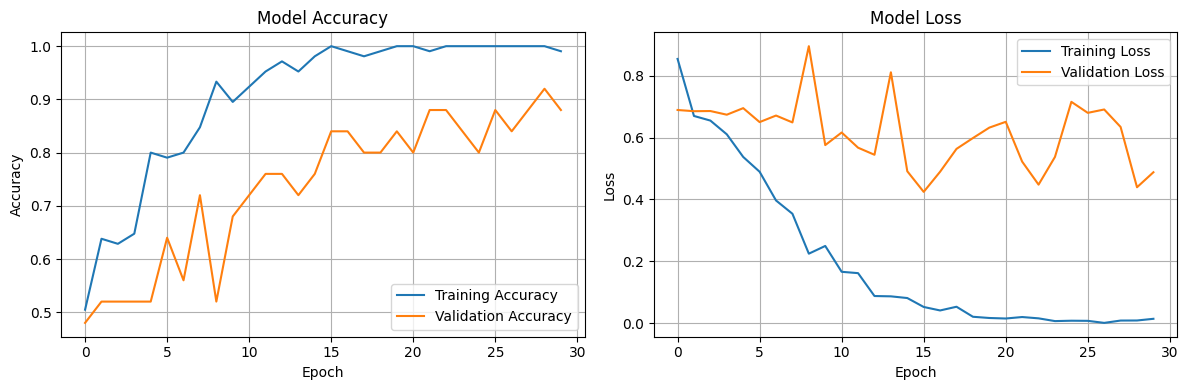

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 📊 Eğitim Sürecinin Görselleştirilmesi

Accuracy ve Loss grafiklerini çizerek model performansını analiz ediyoruz.

**Grafiklerin Yorumlanması:**

### 🔹 Model Accuracy Grafiği:
- **Training Accuracy (Mavi)**: Eğitim verisindeki doğruluk
- **Validation Accuracy (Turuncu)**: Doğrulama verisindeki doğruluk
- **İdeal durum:** İki çizgi birbirine yakın ve yükseliyor
- **Overfitting işareti:** Training çok yüksek, validation düşük kalıyor

### 🔹 Model Loss Grafiği:
- **Training Loss (Mavi)**: Eğitim hatası
- **Validation Loss (Turuncu)**: Doğrulama hatası
- **İdeal durum:** İki çizgi birlikte düşüyor
- **Problem işareti:** Validation loss artmaya başlıyor

**Model 1 ile Karşılaştırma:**
- Bu grafikleri Model 1'in grafikleriyle karşılaştırın
- Transfer learning'in etkisini göreceksiniz
- Model 1 muhtemelen daha hızlı ve yüksek accuracy'e ulaşmıştır

## ✅ Test Accuracy Hesaplama

Modelin doğrulama verisi üzerindeki nihai performansını ölçüyoruz.

**Test Accuracy:**
- Model 2'nin sıfırdan öğrenerek ulaştığı doğruluk oranı
- Bu değeri Model 1 ve Model 3 ile karşılaştıracağız

**Beklenen Sonuçlar:**
- Model 1 (Transfer Learning) > Model 2 (Sıfırdan) beklenir
- Ancak Model 3'te hiperparametre optimizasyonu yaparak Model 2'yi geliştireceğiz

**Sözlü Sunumda Cevap Vereceğiniz Sorular:**
- "Model 1 neden daha iyi sonuç verdi?"
- "Transfer learning'in avantajı ne?"
- "Sıfırdan eğitimin dezavantajları neler?"

In [15]:
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8800 - loss: 0.4878
Test Accuracy: 0.8800
Test Loss: 0.4878


## 💾 Model 2'nin Kaydedilmesi

Eğitilmiş Model 2'yi **model2_basic_cnn.h5** dosyasına kaydediyoruz.

Bu sayede:
- Model 3 ile performans karşılaştırması yapabiliriz
- Daha sonra tahmin yapabiliriz
- Model 1, Model 2 ve Model 3'ü yan yana değerlendirebiliriz

**Model 2 Özeti:**
- Sıfırdan eğitilmiş basit CNN modeli
- 3 Conv katmanı + 3 MaxPooling katmanı
- 30 epoch eğitim
- Transfer learning kullanılmadı

In [16]:
model.save('model2_basic_cnn.h5')

# Task
Okay, let's proceed to the next step. I'll load the required libraries (`IPython.display`, `ipywidgets`, `PIL`, `numpy`) in the notebook to prepare for loading the saved model and creating the file upload functionality.

## Kütüphaneleri Yükle

### Subtask:
Gerekli kütüphaneleri (örneğin IPython.display, ipywidgets, PIL, numpy) yükle.


**Reasoning**:
I need to import the specified libraries (IPython.display, ipywidgets, PIL, and numpy) as instructed by the subtask.



In [17]:
from IPython.display import display
import ipywidgets as widgets
from PIL import Image
import numpy as np

print("✅ Gerekli kütüphaneler başarıyla yüklendi.")

✅ Gerekli kütüphaneler başarıyla yüklendi.


## Kaydedilmiş Modeli Yükle

### Subtask:
Önceden kaydettiğimiz `model2_basic_cnn.h5` modelini yükle.


**Reasoning**:
The user wants to load the previously saved Keras model. I will import the `load_model` function, load the model file 'model2_basic_cnn.h5', and then display its summary to verify it's loaded correctly.



In [18]:
from tensorflow.keras.models import load_model

loaded_model = load_model('model2_basic_cnn.h5')

print("✅ 'model2_basic_cnn.h5' başarıyla yüklendi.")
loaded_model.summary()

✅ 'model2_basic_cnn.h5' başarıyla yüklendi.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,900 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [28]:
print("📸 Modelin tahmin yapabilmesi için bir resim yükleyin.")

upload_widget = widgets.FileUpload(
    accept='image/*',
    multiple=False,
    description='Resim Yükle',
    button_style='primary'
)

display(upload_widget)

output_area = widgets.Output()
display(output_area)

print("\n✅ Resim yükleme widget'ı ve tahmin sonuç alanı hazırlandı.")

📸 Modelin tahmin yapabilmesi için bir resim yükleyin.


FileUpload(value={}, accept='image/*', button_style='primary', description='Resim Yükle')

Output()


✅ Resim yükleme widget'ı ve tahmin sonuç alanı hazırlandı.


In [29]:
import io
from IPython.display import clear_output

def on_upload_change(change):
    with output_area:
        clear_output()
        if change['type'] == 'change' and 'new' in change:
            if upload_widget.value:
                uploaded_file = list(upload_widget.value.values())[0]
                content = uploaded_file['content']

                # PIL Image objesi olarak yükle
                image = Image.open(io.BytesIO(content)).convert('RGB')
                display(image.resize((150, 150)))

                # Görüntüyü modele uygun boyuta getir ve normalize et
                image = image.resize((IMG_SIZE, IMG_SIZE))
                image = np.array(image) / 255.0  # Normalize et
                image = np.expand_dims(image, axis=0)  # Batch boyutu ekle

                # Tahmin yap
                predictions = loaded_model.predict(image)
                predicted_class_index = np.argmax(predictions)
                confidence = np.max(predictions) * 100

                # Sınıf etiketlerini al
                class_labels = list(train_generator.class_indices.keys())
                predicted_label = class_labels[predicted_class_index]

                print(f"\n📸 Yüklenen Resim İçin Tahmin:")
                print(f"\tTahmin Edilen Sınıf: {predicted_label}")
                print(f"\tGüvenirlik: {confidence:.2f}%")

                # Güvenirlik seviyesine göre açıklama ekle
                if confidence > 90:
                    print("\tHarika! Model bu tahminden oldukça emin.")
                elif confidence > 70:
                    print("\tİyi bir tahmin, ancak daha fazla veriyle güvenirlik artırılabilir.")
                else:
                    print("\tModelin emin olmadığı bir durum. Daha fazla inceleme gerekebilir.")

# Widget'a event listener ekle
upload_widget.observe(on_upload_change, names='value')

print("✅ Resim yükleme ve tahmin işleyici başarıyla ayarlandı. Lütfen şimdi yukarıdaki butondan bir resim yükleyin.")

✅ Resim yükleme ve tahmin işleyici başarıyla ayarlandı. Lütfen şimdi yukarıdaki butondan bir resim yükleyin.
